In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
N = 1000
n_monte_carlo = 10000
prior_ratios = np.arange(0.01, 1.0, .01)

In [3]:
prior_ratio_result = []

mean_rig_random_rule_result = []
mean_rig_zero_rule_result = []
mean_rig_one_rule_result = []
mean_rig_prior_rule_result = []

def calc_binary_cross_entropy(y, y_hat):
    return -1.0 * ((y * np.log(y_hat)) + ((1.0 - y) * np.log(1.0 - y_hat)))

# vary CTR
for prior_ratio in prior_ratios:
    
    y = np.random.binomial(n=1, p=prior_ratio, size=(N, n_monte_carlo))
    y_hat_random_rule = np.random.binomial(n=1, p=0.5, size=(N, n_monte_carlo))
    y_hat_zero_rule = np.zeros((N, n_monte_carlo))
    y_hat_one_rule = np.ones((N, n_monte_carlo))
    y_hat_prior_rule = np.random.binomial(n=1, p=prior_ratio, size=(N, n_monte_carlo))
    
    # entropy prior constant over sim
    entropy_prior = calc_binary_cross_entropy(y=prior_ratio, y_hat=prior_ratio)

    # NE random rule sim
    bce_random_rule = calc_binary_cross_entropy(y=y, y_hat=np.where(y_hat_random_rule == 1.0, .999, .001))
    ne_random_rule = (bce_random_rule / entropy_prior) / N
    
    # NE zero rule sim
    bce_zero_rule = calc_binary_cross_entropy(y=y, y_hat=np.where(y_hat_zero_rule == 1.0, .999, .001))
    ne_zero_rule = (bce_zero_rule / entropy_prior) / N
    
    # NE one rule sim
    bce_one_rule = calc_binary_cross_entropy(y=y, y_hat=np.where(y_hat_one_rule == 1.0, .999, .001))
    ne_one_rule = (bce_one_rule / entropy_prior) / N

    # NE prior rule sim
    bce_prior_rule = calc_binary_cross_entropy(y=y, y_hat=np.where(y_hat_prior_rule == 1.0, .999, .001))
    ne_prior_rule = (bce_prior_rule / entropy_prior) / N
    
    prior_ratio_result.append(prior_ratio)
    
    mean_rig_random_rule_result.append((1.0 - ne_random_rule).mean())
    mean_rig_zero_rule_result.append((1.0 - ne_zero_rule).mean())
    mean_rig_one_rule_result.append((1.0 - ne_one_rule).mean())
    mean_rig_prior_rule_result.append((1.0 - ne_prior_rule).mean())

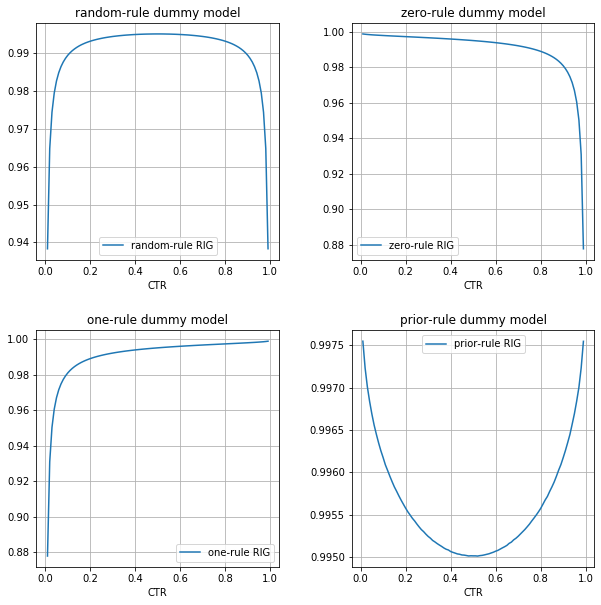

In [4]:
# plot
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10.0, 10.0)
fig.subplots_adjust(hspace=0.3, wspace=0.3)


g = sb.lineplot(prior_ratio_result, mean_rig_random_rule_result, label='random-rule RIG', ax=axs[0][0]);
g.set(title='random-rule dummy model', xlabel='CTR');
g.grid();

g = sb.lineplot(prior_ratio_result, mean_rig_zero_rule_result, label='zero-rule RIG', ax=axs[0][1]);
g.set(title='zero-rule dummy model', xlabel='CTR');
g.grid();

g = sb.lineplot(prior_ratio_result, mean_rig_one_rule_result, label='one-rule RIG', ax=axs[1][0]);
g.set(title='one-rule dummy model', xlabel='CTR');
g.grid();

g = sb.lineplot(prior_ratio_result, mean_rig_prior_rule_result, label='prior-rule RIG', ax=axs[1][1]);
g.set(title='prior-rule dummy model', xlabel='CTR');
g.grid();

fig.savefig('relative_information_gain_sim')